In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


#matplotlib.use('TkAgg')
%matplotlib inline
sns.set(style="whitegrid")


In [2]:
data = 'CaseStudy_training_data.xlsx'
df = pd.read_excel(data, sheet_name='Model_data')
df.head()

,ID,OD,Low_inc,SURG,rx ds,A,B,C,D,E,...,I,J,K,L,M,N,R,S,T,V
0,1,1,1,0,794,0,0,0,1,1,...,1,1,0,1,1,1,1,0,0,0
1,2,1,1,0,457,0,0,1,0,1,...,1,1,0,0,0,1,1,1,0,0
2,3,1,1,1,722,0,1,0,1,1,...,1,1,1,0,1,0,1,0,0,0
3,4,0,1,0,262,0,1,0,0,1,...,1,0,1,1,1,1,1,1,1,0
4,5,1,1,0,780,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0


1. Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       1000 non-null   int64
 1   OD       1000 non-null   int64
 2   Low_inc  1000 non-null   int64
 3   SURG     1000 non-null   int64
 4   rx ds    1000 non-null   int64
 5   A        1000 non-null   int64
 6   B        1000 non-null   int64
 7   C        1000 non-null   int64
 8   D        1000 non-null   int64
 9   E        1000 non-null   int64
 10  F        1000 non-null   int64
 11  H        1000 non-null   int64
 12  I        1000 non-null   int64
 13  J        1000 non-null   int64
 14  K        1000 non-null   int64
 15  L        1000 non-null   int64
 16  M        1000 non-null   int64
 17  N        1000 non-null   int64
 18  R        1000 non-null   int64
 19  S        1000 non-null   int64
 20  T        1000 non-null   int64
 21  V        1000 non-null   int64
dtypes: int64(22)
memory usage

In [4]:
df.describe()

,ID,OD,Low_inc,SURG,rx ds,A,B,C,D,E,...,I,J,K,L,M,N,R,S,T,V
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.235000,0.351000,0.435000,382.042000,0.138000,0.316000,0.280000,0.47300,0.651000,...,0.684000,0.526000,0.504000,0.49000,0.87900,0.456000,0.88200,0.40600,0.262000,0.027000
std,288.819436,0.424211,0.477522,0.496005,304.433714,0.345073,0.465146,0.449224,0.49952,0.476892,...,0.465146,0.499573,0.500234,0.50015,0.32629,0.498309,0.32277,0.49133,0.439943,0.162164
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,250.750000,0.000000,0.000000,0.000000,109.500000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,1.00000,0.00000,0.000000,0.000000
50%,500.500000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,1.000000,1.000000,1.000000,0.00000,1.00000,0.000000,1.00000,0.00000,0.000000,0.000000
75%,750.250000,0.000000,1.000000,1.000000,600.000000,0.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.000000,0.000000
max,1000.000000,1.000000,1.000000,1.000000,1689.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000


2. Data cleaning

In [5]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop(['ID'], axis=1)
df_cleaned = df_cleaned.rename(columns={'rx ds': 'rx_ds'})
df_cleaned.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,I,J,K,L,M,N,R,S,T,V
0,1,1,0,794,0,0,0,1,1,1,...,1,1,0,1,1,1,1,0,0,0
1,1,1,0,457,0,0,1,0,1,1,...,1,1,0,0,0,1,1,1,0,0
2,1,1,1,722,0,1,0,1,1,1,...,1,1,1,0,1,0,1,0,0,0
3,0,1,0,262,0,1,0,0,1,1,...,1,0,1,1,1,1,1,1,1,0
4,1,1,0,780,0,0,0,0,1,1,...,1,0,1,0,1,0,1,0,0,0


3. Feature Engineering

In [6]:
# Perform percentile-based bucketing for 'rx_ds'
df_features = df_cleaned.copy()
df_features['rx_ds_bucket'] = pd.qcut(
    df_cleaned['rx_ds'], 
    q=4, 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
    )

In [7]:
df_features.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,J,K,L,M,N,R,S,T,V,rx_ds_bucket
0,1,1,0,794,0,0,0,1,1,1,...,1,0,1,1,1,1,0,0,0,Q4
1,1,1,0,457,0,0,1,0,1,1,...,1,0,0,0,1,1,1,0,0,Q3
2,1,1,1,722,0,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,Q4
3,0,1,0,262,0,1,0,0,1,1,...,0,1,1,1,1,1,1,1,0,Q2
4,1,1,0,780,0,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0,Q4


In [8]:
# Create a new feature that is the sum of all the binary features
binary_cols = [col for col in df_features.columns if col not in ['OD', 'rx_ds', 'rx_ds_bucket']]


In [9]:
# Perform one-hot encoding for 'rx_ds_bucket'
df_one_hot = pd.get_dummies(df_features['rx_ds_bucket'], prefix='rx_ds_bucket')
df_features = pd.concat([df_features, df_one_hot], axis=1)
df_features.drop(['rx_ds_bucket'], axis=1, inplace=True)
df_features.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,M,N,R,S,T,V,rx_ds_bucket_Q1,rx_ds_bucket_Q2,rx_ds_bucket_Q3,rx_ds_bucket_Q4
0,1,1,0,794,0,0,0,1,1,1,...,1,1,1,0,0,0,0,0,0,1
1,1,1,0,457,0,0,1,0,1,1,...,0,1,1,1,0,0,0,0,1,0
2,1,1,1,722,0,1,0,1,1,1,...,1,0,1,0,0,0,0,0,0,1
3,0,1,0,262,0,1,0,0,1,1,...,1,1,1,1,1,0,0,1,0,0
4,1,1,0,780,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1


4. Model building

In [10]:
from sklearn.model_selection import train_test_split
df_model = df_features.copy()

# Removing 'OD' and 'rx_ds' columns from training data (rx_ds is not needed as it is bucketed)
X = df_model.drop(['OD', 'rx_ds'], axis=1)
y = df_model['OD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 23), (200, 23), (800,), (200,))

Baselining our model performance

In [11]:
# Baselining
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Majority Class (Zero-Rule Algorithm)
majority_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
majority_baseline.fit(X_train, y_train)
y_pred_majority = majority_baseline.predict(X_test)
accuracy_majority = accuracy_score(y_test, y_pred_majority)

# Stratified Random Guessing
stratified_baseline = DummyClassifier(strategy='stratified', random_state=42)
stratified_baseline.fit(X_train, y_train)
y_pred_stratified = stratified_baseline.predict(X_test)
accuracy_stratified = accuracy_score(y_test, y_pred_stratified)

baseline_accuracies = pd.DataFrame({
    'Baseline Type': ['Majority Class Prediction', 'Stratified Random Guessing'],
    'Accuracy': [accuracy_majority, accuracy_stratified]
})

baseline_accuracies

,Baseline Type,Accuracy
0,Majority Class Prediction,0.705
1,Stratified Random Guessing,0.590


In [12]:
# Initialize, fit, and predict with Bernoulli Naive Bayes
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(X_train, y_train)
y_pred_bnb = bernoulli_nb_model.predict(X_test)
y_pred_proba_bnb = bernoulli_nb_model.predict_proba(X_test)[:, 1]

5. Model evaluation

In [13]:
# Evaluate the model
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
recall_bnb = recall_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)
conf_matrix_bnb = confusion_matrix(y_test, y_pred_bnb)
roc_auc_bnb = roc_auc_score(y_test, y_pred_proba_bnb)
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, y_pred_proba_bnb)

# Calculate Positive Predictive Value (PPV) and Negative Predictive Value (NPV)
TN, FP, FN, TP = conf_matrix_bnb.ravel()
ppv_bnb = TP / (TP + FP)
npv_bnb = TN / (TN + FN)
specificity_bnb = TN / (TN + FP)

# Store results in a DataFrame
results_bnb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (PPV)', 'Recall (Sensitivity)', 'Specificity', 'F1 Score', 'Positive Predictive Value (PPV)', 'Negative Predictive Value (NPV)', 'ROC AUC'],
    'Bernoulli Naive Bayes': [accuracy_bnb, precision_bnb, recall_bnb, specificity_bnb, f1_bnb, ppv_bnb, npv_bnb, roc_auc_bnb]
})

results_bnb

,Metric,Bernoulli Naive Bayes
0,Accuracy,0.785000
1,Precision (PPV),0.700000
2,Recall (Sensitivity),0.474576
3,Specificity,0.914894
4,F1 Score,0.565657
5,Positive Predictive Value (PPV),0.700000
6,Negative Predictive Value (NPV),0.806250
7,ROC AUC,0.807549


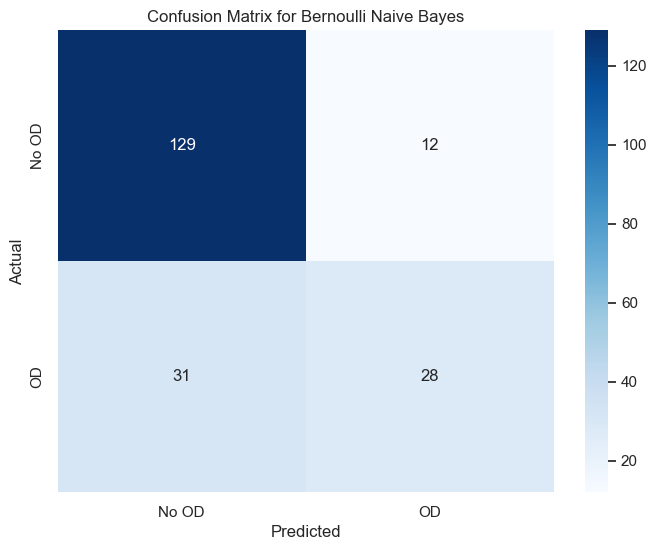

In [14]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No OD', 'OD'], yticklabels=['No OD', 'OD'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Bernoulli Naive Bayes')
plt.show()

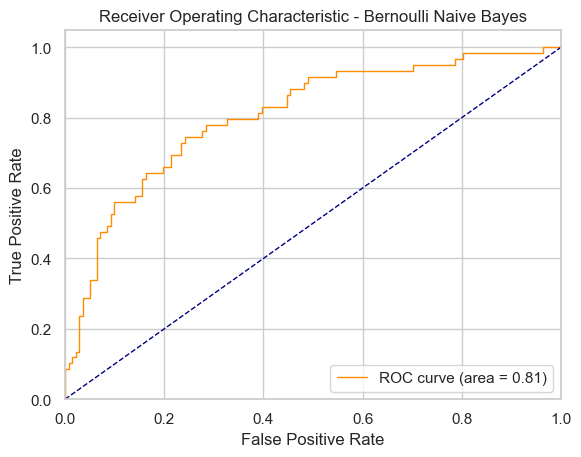

In [15]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr_bnb, tpr_bnb, color='darkorange', lw=1,
         label=f'ROC curve (area = {roc_auc_bnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.show()

6. Comparin the model persormance

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

# Assuming results_bnb has already been defined from the Bernoulli Naive Bayes section
# Define and train the Logistic Regression model
logistic_model = LogisticRegression(
    random_state=42, max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the logistic regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)

# Calculate PPV and NPV for Logistic Regression
TN, FP, FN, TP = conf_matrix_logistic.ravel()
ppv_logistic = TP / (TP + FP)
npv_logistic = TN / (TN + FN)
specificity_logistic = TN / (TN + FP)

# Store logistic regression results in a DataFrame
results_logistic = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (PPV)', 'Recall (Sensitivity)', 'Specificity', 'F1 Score', 'Positive Predictive Value (PPV)', 'Negative Predictive Value (NPV)', 'ROC AUC'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic, specificity_logistic, f1_logistic, ppv_logistic, npv_logistic, roc_auc_logistic]
})

results_logistic

,Metric,Logistic Regression
0,Accuracy,0.715000
1,Precision (PPV),0.511628
2,Recall (Sensitivity),0.745763
3,Specificity,0.702128
4,F1 Score,0.606897
5,Positive Predictive Value (PPV),0.511628
6,Negative Predictive Value (NPV),0.868421
7,ROC AUC,0.774612


Comparison of Bernoulli Naive Bayes and Logistic Regression:


,Metric,Bernoulli Naive Bayes,Logistic Regression
0,Accuracy,0.785000,0.715000
1,Precision (PPV),0.700000,0.511628
2,Recall (Sensitivity),0.474576,0.745763
3,Specificity,0.914894,0.702128
4,F1 Score,0.565657,0.606897
5,Positive Predictive Value (PPV),0.700000,0.511628
6,Negative Predictive Value (NPV),0.806250,0.868421
7,ROC AUC,0.807549,0.774612


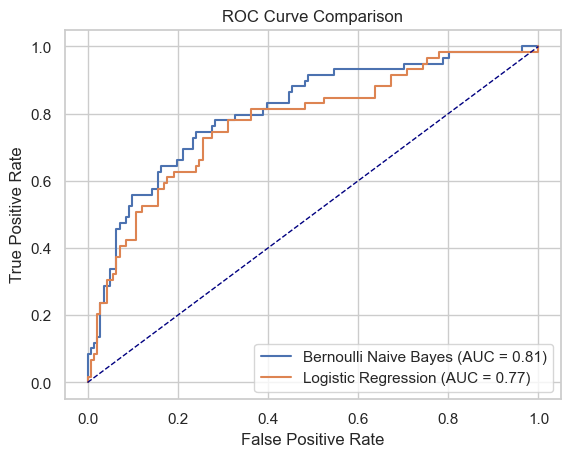

In [28]:
# Combine results for comparison
comparison_results = results_bnb.merge(results_logistic, on='Metric')

# Print the comparison results
print("Comparison of Bernoulli Naive Bayes and Logistic Regression:")
display(comparison_results)

# Plotting ROC Curves for both models
plt.figure()
plt.plot(fpr_bnb, tpr_bnb,
         label=f'Bernoulli Naive Bayes (AUC = {roc_auc_bnb:.2f})')
plt.plot(fpr_logistic, tpr_logistic,
         label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

8. Key Metrics Analysis


**Accuracy:** The BNB model achieves slightly higher accuracy, meaning it makes fewer total errors. However, we know accuracy alone is misleading in this case i.e. class imbalance

**Precision** Again, higher precision in the BNB model. Hence it's more cautious and accurate when predicting addiction, which can be critical in this case, since false positives (incorrectly predicting addiction) are problematic

**Recall** Here, the Logistic Regression has a significantly higher recall, suggesting it catches more addicted cases, but may also make more false positives i.e. due to its lower precision. Can we leave with false alarms?

**Specificity** (correctly identify non-addicted individuals) BNB’s higher specificity shows it better avoids false positives e.g. social stigma or unnecessary treatment

**F1 Score** As a result, the Logistic Regression has a slightly higher F1 Score, providing a better balance between precision and recall. Are both metrics equally important?

**Negative Predictive Value (NPV)** (Probability a predicted non-addicted person is indeed non-addicted): Higher for Logistic Regression (0.868), showing it has a strong ability to correctly rule out non-addicted individuals

**OC AUC** BNB slightly outperforms Logistic Regression here, showing it may be more reliable across various thresholds

### **So what!?**


**Bernoulli Naive Bayes** (In this case) is more reliable in making predictions when it identifies someone as likely addicted (precision and specificity) - Preventing unnecessary treatment or social stigma

**Logistic Regression** (In this case) is more sensitive to catching potential addicted cases (at the expense of more false positives). Useful in preventiving potential cases of addiction

9. Alternatives to improve our model

Results with Threshold = 0.3 and Alpha = 0.5
                            Metric     Value
0                         Accuracy  0.760000
1                  Precision (PPV)  0.577465
2             Recall (Sensitivity)  0.694915
3                      Specificity  0.787234
4                         F1 Score  0.630769
5  Positive Predictive Value (PPV)  0.577465
6  Negative Predictive Value (NPV)  0.860465
7                          ROC AUC  0.807309


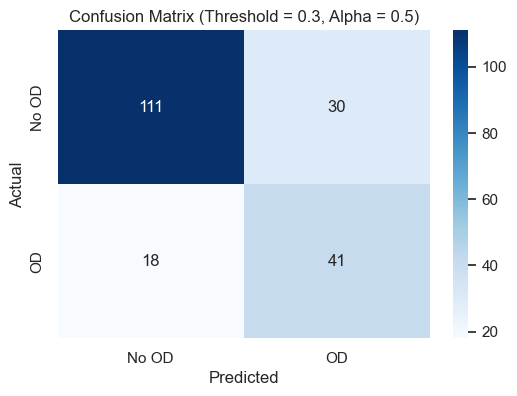

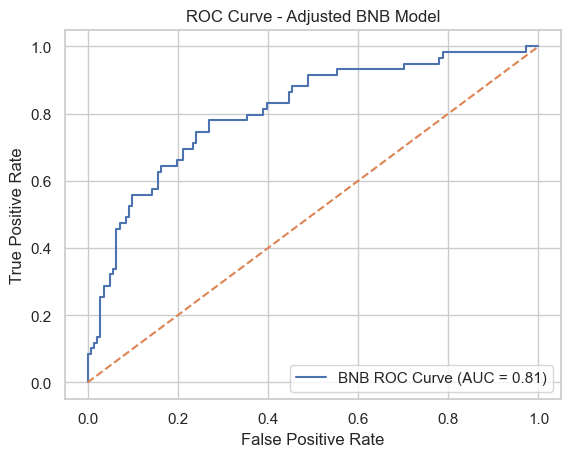

In [30]:
# 1. Adjusting the Decision Threshold for Bernoulli Naive Bayes

def evaluate_bnb_with_threshold(threshold=0.5, alpha=1.0):
    # Initialize and fit the model with the specified smoothing parameter (alpha)
    bnb_model = BernoulliNB(alpha=alpha)
    bnb_model.fit(X_train, y_train)

    # Predict probabilities and apply the custom threshold
    # Probabilities for the positive class
    y_pred_proba = bnb_model.predict_proba(X_test)[:, 1]
    y_pred_threshold = (y_pred_proba >= threshold).astype(
        int)  # Adjust threshold for prediction

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    TN, FP, FN, TP = conf_matrix.ravel()
    ppv = TP / (TP + FP)  # Positive Predictive Value
    npv = TN / (TN + FN)  # Negative Predictive Value
    specificity = TN / (TN + FP)

    # Store results in a DataFrame
    results = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision (PPV)', 'Recall (Sensitivity)', 'Specificity', 'F1 Score',
                   'Positive Predictive Value (PPV)', 'Negative Predictive Value (NPV)', 'ROC AUC'],
        'Value': [accuracy, precision, recall, specificity, f1, ppv, npv, roc_auc]
    })

    # Print the results
    print(f"Results with Threshold = {threshold} and Alpha = {alpha}")
    print(results)

    # Plot the Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No OD', 'OD'], yticklabels=['No OD', 'OD'])
    plt.title(f'Confusion Matrix (Threshold = {threshold}, Alpha = {alpha})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'BNB ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Adjusted BNB Model')
    plt.legend(loc="lower right")
    plt.show()

    return results


# Testing different thresholds and alpha values to improve recall
# Example: Set a lower threshold (e.g., 0.3) and adjust alpha (e.g., 0.5) to see effects on recall
threshold = 0.3
alpha = 0.5  # Can improve recall by reducing the impact of features that would otherwise “cancel out” predictions for certain classes
bnb_results = evaluate_bnb_with_threshold(threshold=threshold, alpha=alpha)